# EDA for auto-mpg
- Identify missing values.
- Estimate Skewness and Kurtosis.
- Correlation Heat Map.
- Scatter plot for different parameters.
- Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.).

Auto-mpg dataset: https://www.kaggle.com/datasets/uciml/autompg-dataset 

## Libraries importation

In [67]:
import pandas as pd
import numpy as np
import matplotlib as mplpip
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

## Identify missing values 

Dataset loading

In [68]:
auto = pd.read_csv("auto-mpg.csv")

Check missing values per column

In [69]:
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Identify non-standard mission values while checking unique values

In [70]:
for column in auto.columns:
    print(f"Unique values in {column}: {auto[column].unique()}")

Unique values in mpg: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Unique values in cylinders: [8 4 6 3 5]
Unique values in displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108. 

We found missing values in horsepower column in the form of question mark "?". To handle this non-standard missing values, we will replace the "?" with Nan to standardize the data

In [71]:
auto.replace('?', np.nan, inplace=True)

Recheck missing values

In [72]:
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Now, we can identify 6 missing values in horsepower

Let's check the data types in the dataset

In [73]:
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


Since horsepower data is object , we will convert it to float for further processing

In [74]:
auto['horsepower'] = auto['horsepower'].astype(float)

Check again the data types 

In [75]:
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


Horsepower data is successfully converted to float

### Visualizing missing values as matrix

<Axes: >

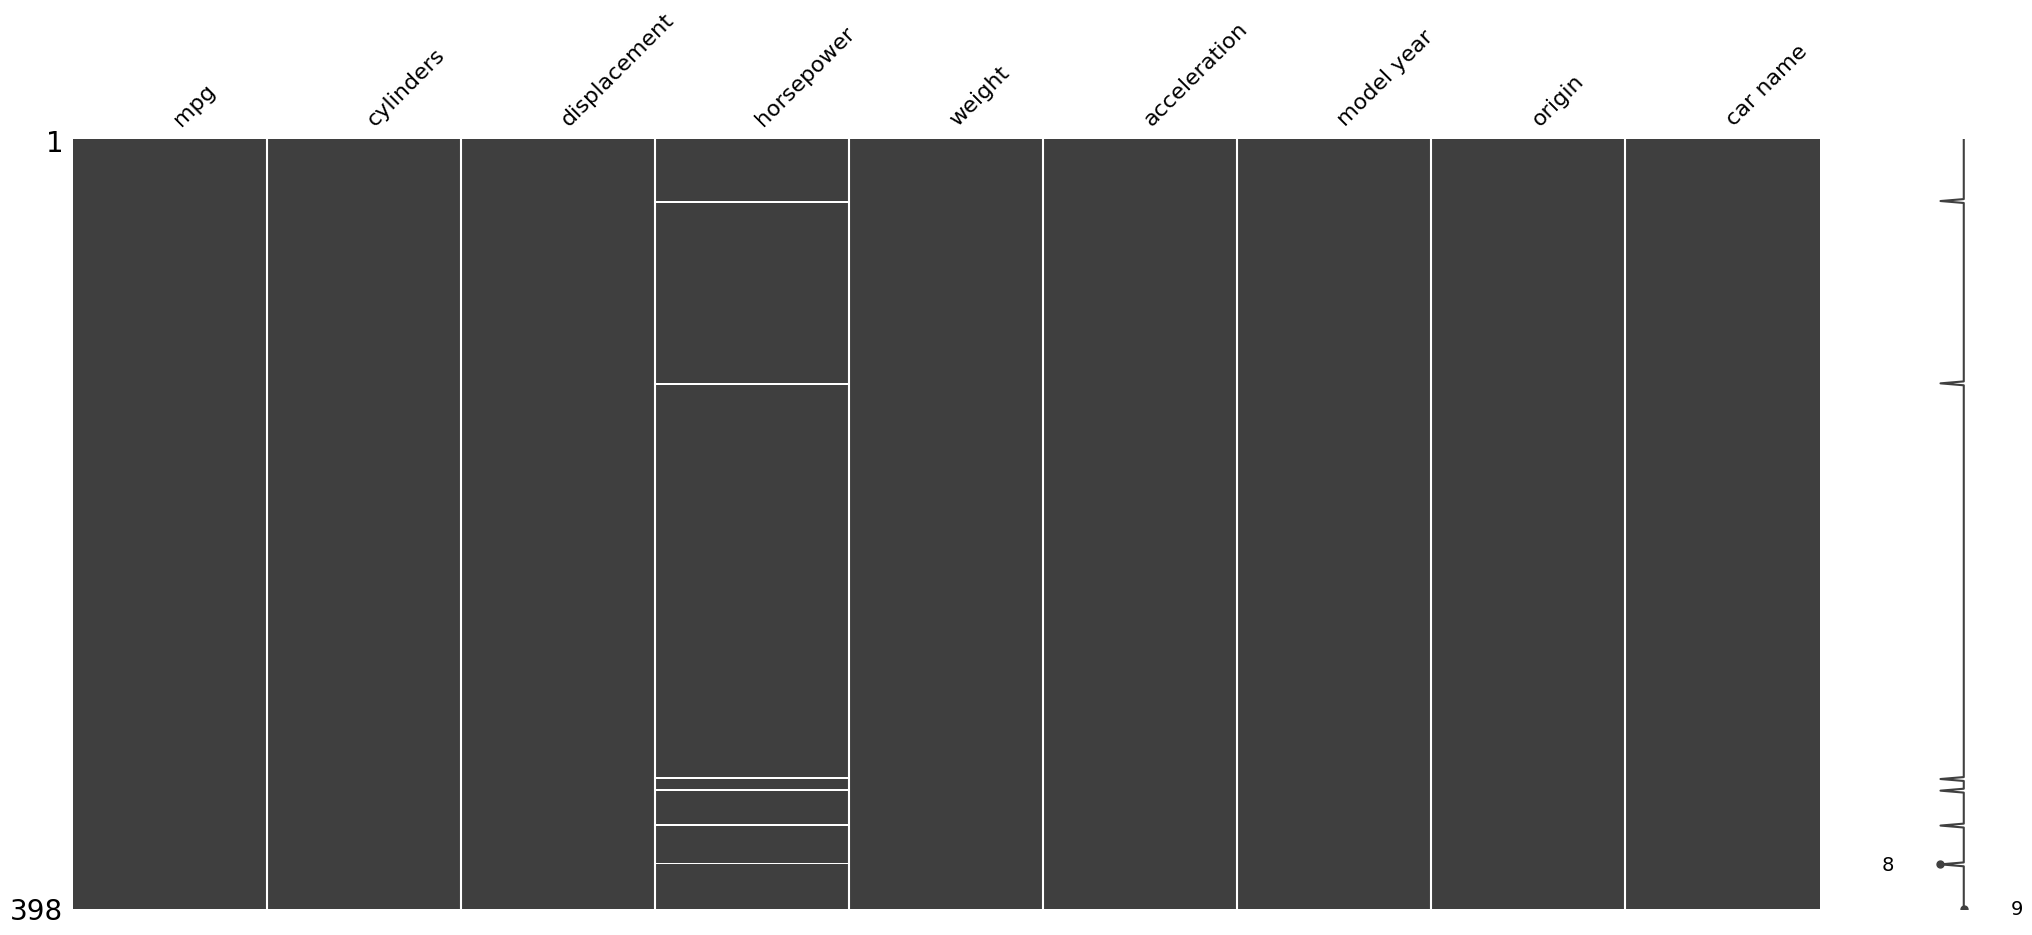

In [76]:
msno.matrix(auto)

We can see that we have 6 missing values in horsepower column. We can also make visualization in bar plotting mode

<Axes: >

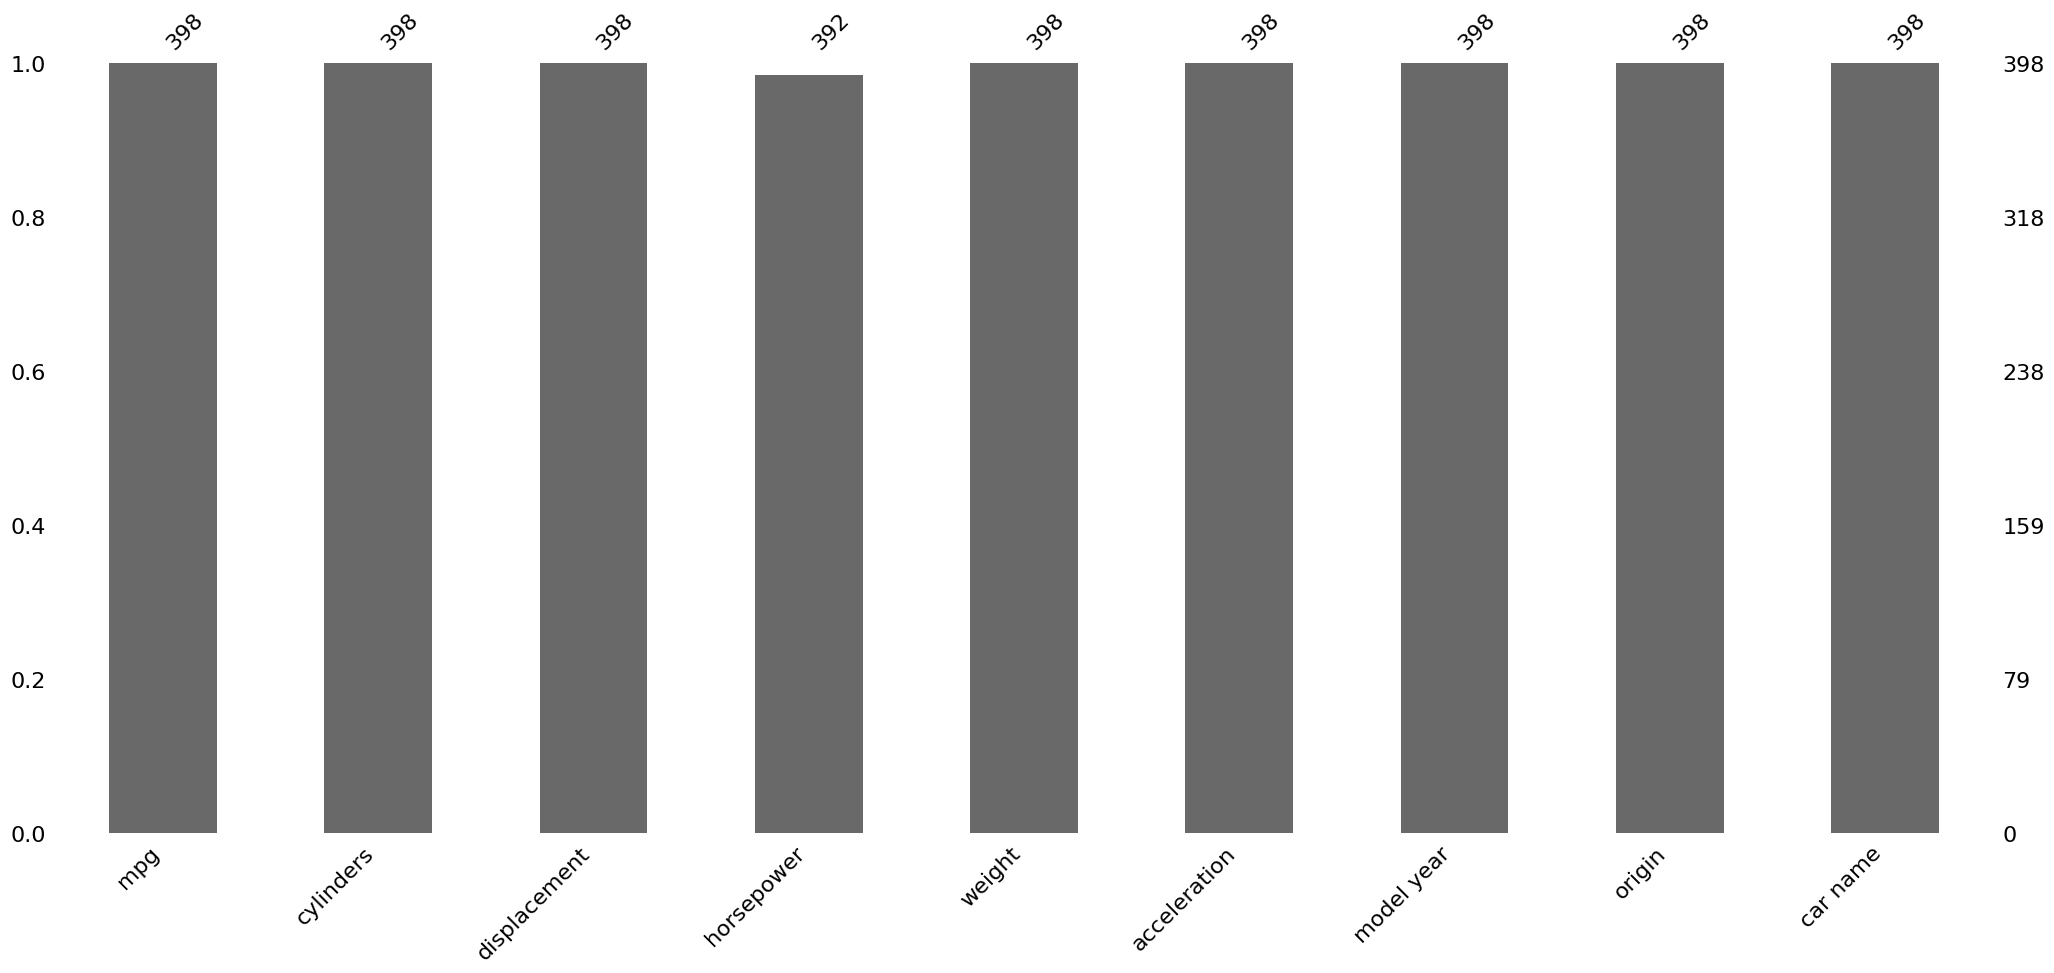

In [77]:
msno.bar(auto)

## Calculate skewness and kurtosis

To calculate skewness and kurtosis values, we should consider only numerical values 

In [78]:
numeric_features = auto.select_dtypes(include=[np.number])
numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

Calculate skewness for each numeric column

In [79]:
skewness = numeric_features.skew()
print("Skewness:")
print(skewness)

Skewness:
mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64


Visualization of skewness

C:\Users\benki\AppData\Local\Temp\ipykernel_18260\3691411661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skewness,color='blue',axlabel ='Skewness')


<Axes: xlabel='Skewness', ylabel='Density'>

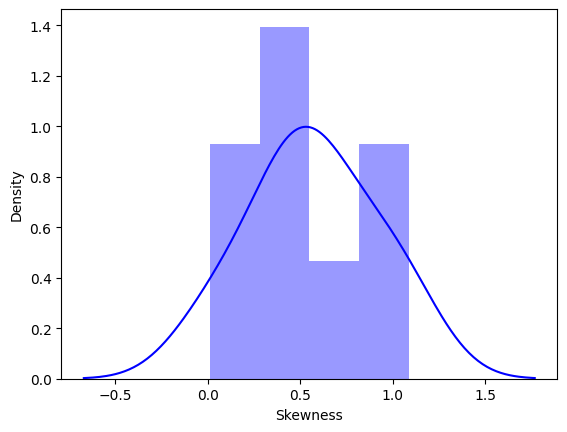

In [80]:
sns.distplot(skewness,color='blue',axlabel ='Skewness')

Results interpretation : 

Based on the provided skewness values and the distribution plot of skewness, we can conclude the following:

- All the numeric features have positive skewness, indicating that their distributions are skewed to the right.
- horsepower has the highest skewness value (1.087326), indicating the most pronounced positive skewness among the features. Origin also has high skewness (0.923776),with a significant right skew in its distribution.
- Other features like displacement and weight have moderate positive skewness, with skewness ranging from 0.5 to 0.7.
- The distribution plot shows a right skewed distribution since it is centred on 0.5, with all the skewness values concentrated on the positive side.
- The dataset contains numeric features with varying degrees of right skewness, indicating that their distributions are not symmetric.

In [81]:
print("Kurtosis:")
print(numeric_features.kurtosis())

Kurtosis:
mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64


C:\Users\benki\AppData\Local\Temp\ipykernel_18260\2339329194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


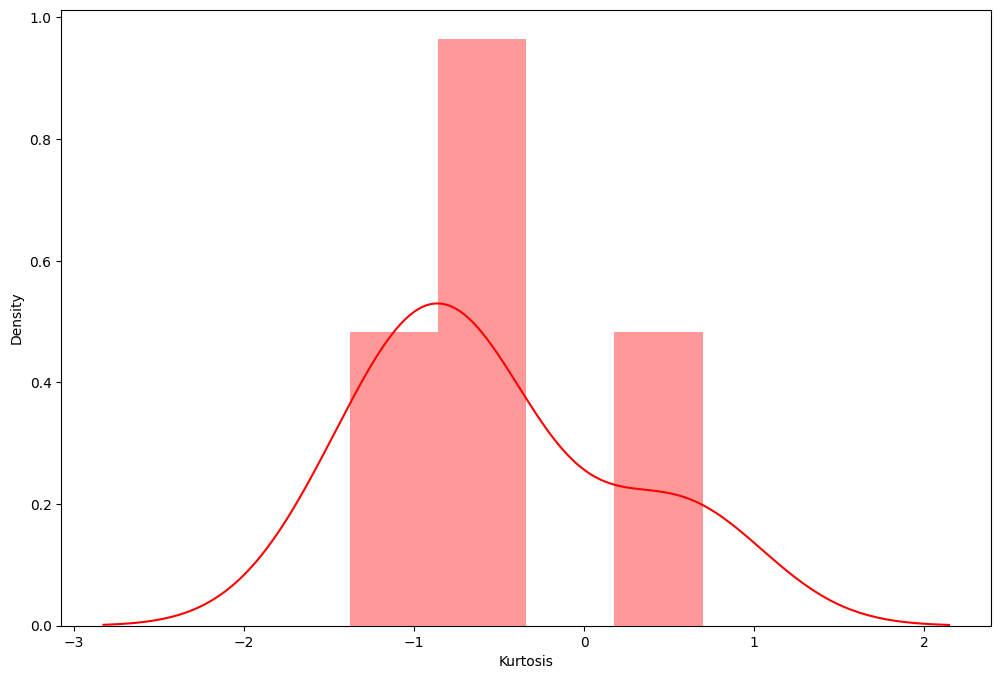

In [82]:
plt.figure(figsize = (12,8))
sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

- The distribution is centered around -1 ,this uggests that many features have distributions with lighter tails and flatter peaks (platykurtic).
  ==> The distribution has lighter tails and a flatter peak compared to a normal distribution.

## Correlation heatMap

Let's calculate the correlation matrix for the numerical values of auto dataframe

In [83]:
correlation = numeric_features.corr()

For example, we will select one column ( the one corresponding to 'horsepower') from the correlation matrix and sorts the resulting series in descending order based on the correlation values. This allows us to see which variables are most strongly positively or negatively correlated with 'horsepower'.

In [84]:
print(correlation['horsepower'].sort_values(ascending = False),'\n')

horsepower      1.000000
displacement    0.897257
weight          0.864538
cylinders       0.842983
model year     -0.416361
origin         -0.455171
acceleration   -0.689196
mpg            -0.778427
Name: horsepower, dtype: float64 



The output shows the correlation values between 'horsepower' and all other numeric columns in the dataFrame, sorted in descending order based on the strength of correlation. The positive correlation value of 'displacement' indicates that as 'horsepower' increases, the 'displacement' also tends to increase, while the negative correlation value of 'mpg' indicates the inverse relationship.

Let's plot the correlation heatmap for better visualization

<Axes: title={'center': 'Correlation matrix'}>

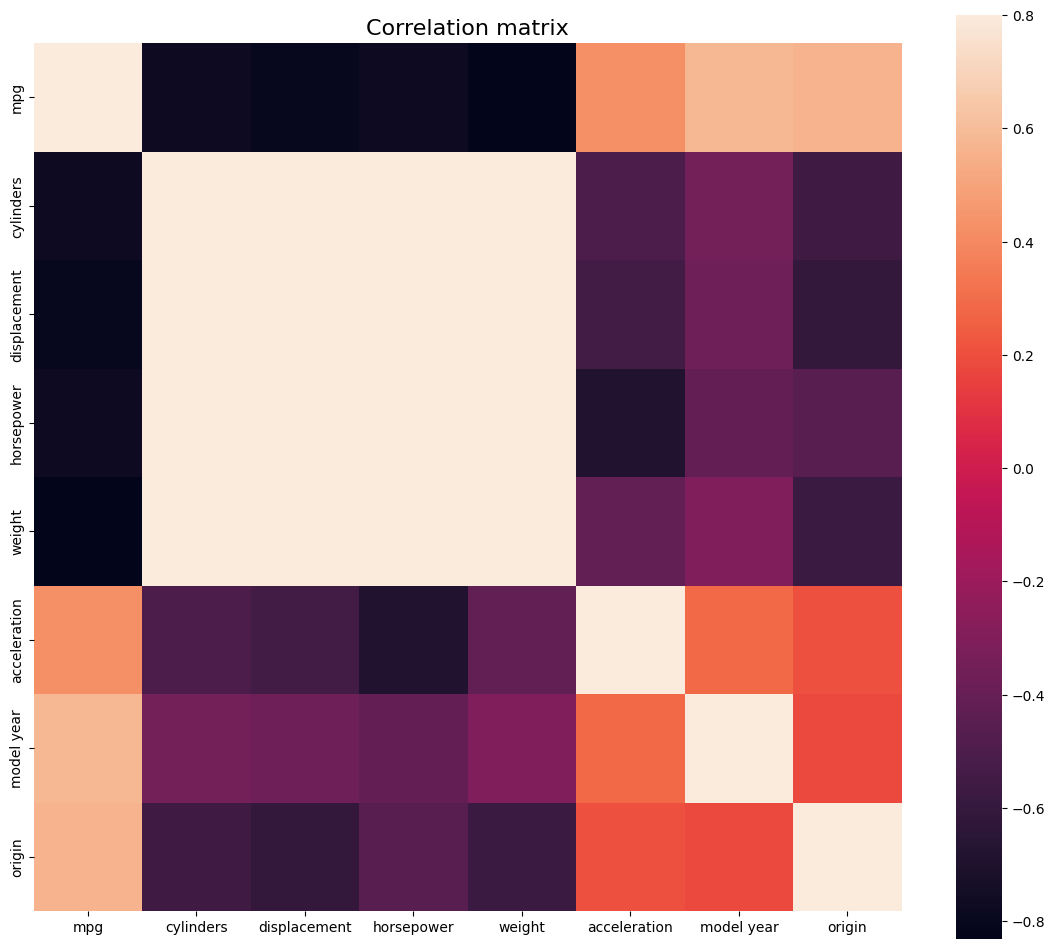

In [86]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation matrix',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

This validates the numerical outputs that we got. If we consider 'horsepower' in the x axis , we will see that the maximum values corresponding to the lightest color correspond to 'horsepower', 'displacement', 'cylinders' and 'weight' as sorted in the previous output. At the same time, the darkest values corresponding to the negative correlation are related to 'mpg' and 'acceleration'. 

An more generally, we can also say that the most correlated pair of variables are considering 'horsepower', 'cylinders', 'displacement' and 'weight'.

## Scatter plot

We will make a scatter plot for the most correlated variables considering horsepower, namely : displacement, weight and cylinders

<Axes: xlabel='cylinders', ylabel='horsepower'>

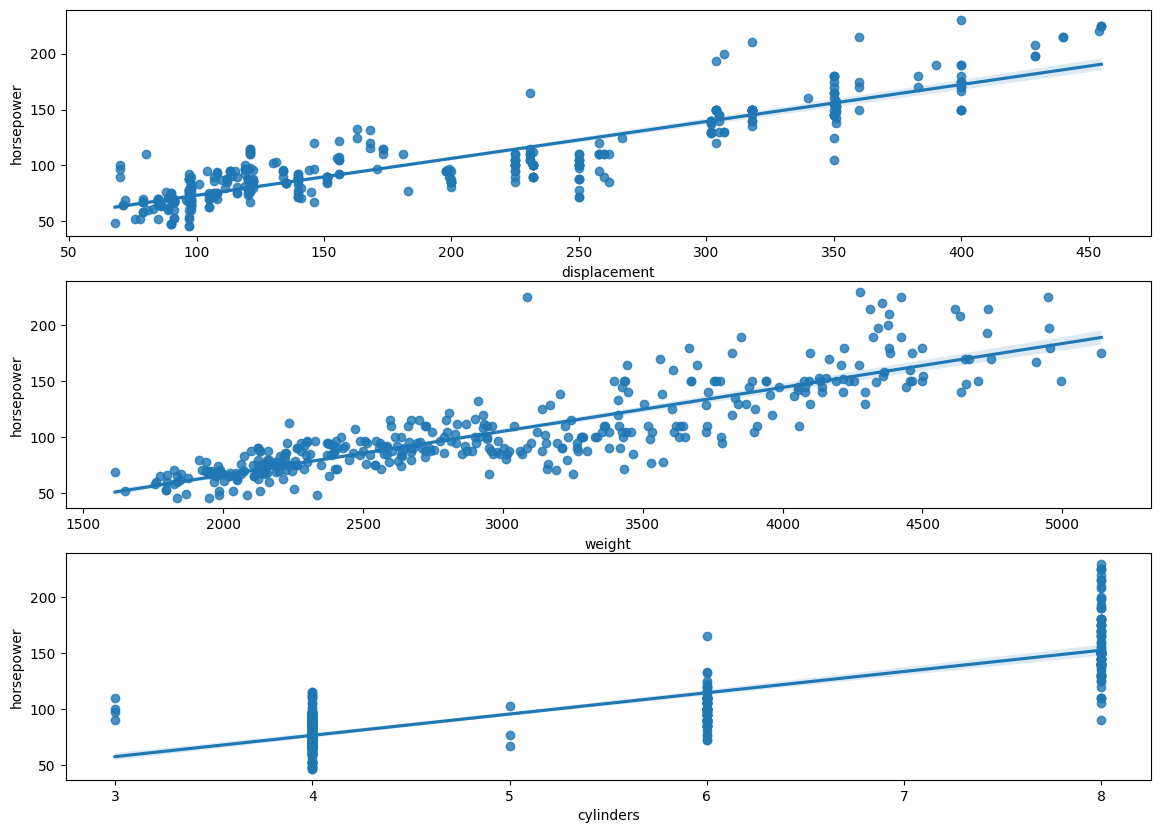

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
Displacement_scatter_plot = pd.concat([auto['horsepower'],auto['displacement']],axis = 1)
sns.regplot(x='displacement',y = 'horsepower',data = Displacement_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
weight_scatter_plot = pd.concat([auto['horsepower'],auto['weight']],axis = 1)
sns.regplot(x='weight',y = 'horsepower',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
cylinders_scatter_plot = pd.concat([auto['horsepower'],auto['cylinders']],axis = 1)
sns.regplot(x='cylinders',y = 'horsepower',data = cylinders_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

### Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.).

Identify categorical values

In [88]:
categorical_features = auto.select_dtypes(include=[object])
categorical_features.columns

Index(['car name'], dtype='object')

The catgorical values that we have in the dataframe are assigned to 'car name' column

Since we have too much unique values in this column, we will automatically assign numerical values based on the unique categorical values present in this column using the pandas factorize() function.

In [89]:
auto['car name'] = pd.factorize(auto['car name'])[0] + 1

Now, let's verify the new values in our dataframe by printing the dataframe head

In [90]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,4
4,17.0,8,302.0,140.0,3449,10.5,70,1,5


We can notice that instead of having string values in the column car name, we have numerical values for each car name